In [1]:
# encoding: utf-8
# decoding: utf-8
import os, sys, pdb
sys.path.append("/Users/xiaolihe/Documents/Album")
import plistlib
import math
import common_lib as cl
import numpy as np
import time, datetime
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as hcluster
from skimage import io
%pdb on


Automatic pdb calling has been turned ON


## Subfunctions

In [16]:
# get plist information
def get_plist_infor( user_name = 'hxl', parent_path = '/Users/luke/Downloads/album_project/gps_time_info/',):
    ## get plist information
    
    path = os.path.join(parent_path, user_name)
    fns_gps = cl.find_all_file_name(path, '.plist', 'gps')
    fns_exif = cl.find_all_file_name(path, '.plist', 'exif')
    # print(len(fns))
    gps_info = []
    exif_info = []
    wanted_gps = np.empty(shape = (len(fns_gps), 3)) 	# only gps (3 dimensions)
    wanted_time = np.empty(shape = (len(fns_gps), 1), dtype = datetime.datetime) 	# only date (9 dimensions: year, month, day, hour, min, sec, wday (Mon - Sun), day in year, daylight savings time
    file_names = np.array([f.split(user_name+os.path.sep)[1].split('-gps')[0] + '.jpg' for f in fns_gps])
    # np.empty(shape = (len(fns_gps), 3)) 	# only time (3 dimensions)
    idx = 0
    for f in fns_gps:
        gps_info.append(plistlib.readPlist(f))
        wanted_gps[idx, 0] = gps_info[idx]['Altitude']
        wanted_gps[idx, 1] = gps_info[idx]['Latitude']
        wanted_gps[idx, 2] = gps_info[idx]['Longitude']
        wanted_time[idx] = datetime.datetime.strptime(gps_info[idx]['DateStamp']+':'+gps_info[idx]['TimeStamp'], '%Y:%m:%d:%H:%M:%S')
        # time.strptime(tmp, "%Y:%m:%d:%H:%M:%S")
        idx += 1
    failed_idx = []
    for f in fns_exif:
        try:
            exif_info.append(plistlib.readPlist(f))
        except:
            failed_idx.append(f)
            continue
    print(len(gps_info), len(exif_info), len(file_names))
#     print(gps_info[10])
#     print(exif_info[10])
#     print(file_names[10])
    print("Failed exif %d" % len(failed_idx))
    # visualize
    # scatter plot
    return wanted_gps, wanted_time, gps_info, exif_info, file_names

# convert datetime to seconds
def convert_datetime_seconds(dt_list):
    #  - min_time
    min_time = min(dt_list)
    dt_list_new = np.empty(shape = (len(dt_list), 1))
    for i in range(len(dt_list)):
        dt_list_new[i] = ((dt_list[i] - min_time)[0].total_seconds())
    return dt_list_new

# find cluster in given dimension
def find_cluster(wanted_info, thresh_lalo = 1.5, show_idx = True):
    if len(wanted_info) == 1:
        return [1]
    elif len(wanted_info) == 0:
        return []
    clusters_info = hcluster.fclusterdata(wanted_info, thresh_lalo, criterion="distance")
    # plotting
    if show_idx:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        if len(wanted_info[1]) == 3:
            ax.scatter(wanted_info[:,0], wanted_info[:,1], wanted_info[:,2], c = clusters_info)
        elif len(wanted_info[1]) == 1:
            ax.scatter(range(len(wanted_info)), wanted_info, c = clusters_info)
        title = "threshold: %f, number of clusters: %d" % (thresh_lalo, len(set(clusters_info)))
        ax.set_title(title)
        plt.show()
    return clusters_info

# print all pics in a given list
def print_pic_all(fn_list, path = "/Volumes/Elements/album/hxl/", full_path = False):
    for f in fn_list:
        img = cl.load_image(f, path, full_path)
        io.imshow(img)
        io.show()

        
        
def lalong2distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d


## Model to select photos
### 1. cluster according to time and gps
### 2. Rank cluster: 
   #### a) Number of photos
   #### b) Find significant dates (such as the New Year....)
   #### c) ???Find time/gps continuation??? Hypothesis: continuation in time or space means more 'meaningful'?
### 3. Choose within cluster

In [3]:
## delete replicated photos (which are too close to each other)
def del_replicated_pics():
    # group those where gps and time are the same 
    # maybe use image comparison later on???
    return
    
## rank clusters based on defined features above
def rank_across_clusters(file_names):
    return
    
    
## rank photos within cluster:
def rank_within_cluster(file_name):
    return

## Get information from .plist files

In [17]:
usr_nm = 'hxl'
wanted_gps, wanted_time, gps_info, exif_info, file_names = get_plist_infor(usr_nm, '/Users/luke/Documents/GitHub/Album/gps_time_info/')
wanted_secs = convert_datetime_seconds(wanted_time)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The readPlist function is deprecated, use load() instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: DeprecationWarning: The readPlist function is deprecated, use load() instead


1076 1732 1076
Failed exif 22


## Visualize function

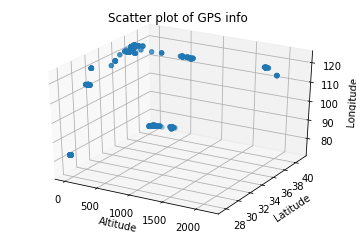

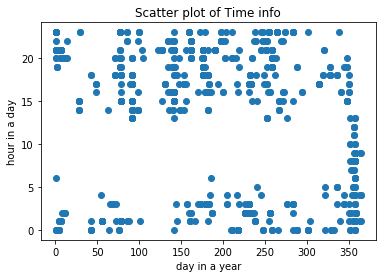

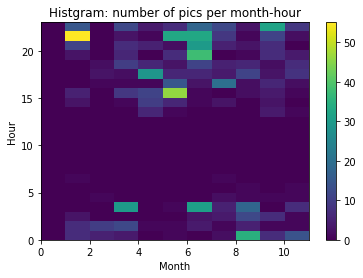

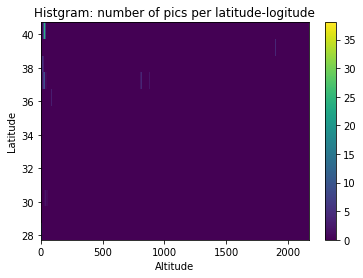

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(wanted_gps[:,0], wanted_gps[:,1], wanted_gps[:,2])
ax.set_xlabel('Altitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Longitude')
ax.set_title('Scatter plot of GPS info')
plt.show()

plt.scatter([wanted_time[x][0].timetuple().tm_yday for x in range(len(wanted_time))], 
            [wanted_time[x][0].timetuple().tm_hour for x in range(len(wanted_time))])
plt.xlabel('day in a year')
plt.ylabel('hour in a day')
plt.title('Scatter plot of Time info')
plt.show()

# histgram
xedges = np.arange(0, 12)
yedges = np.arange(0, 24)
fig, ax = plt.subplots()
h = ax.hist2d([wanted_time[x][0].timetuple().tm_mon for x in range(len(wanted_time))],
              [wanted_time[x][0].timetuple().tm_hour for x in range(len(wanted_time))],
              bins = (xedges, yedges))
plt.xlabel('Month')
plt.ylabel('Hour')
plt.title('Histgram: number of pics per month-hour')
plt.colorbar(h[3], ax=ax)
plt.show()

xedges = np.arange(min(wanted_gps[:, 0]), max(wanted_gps[:, 0]))
yedges = np.arange(min(wanted_gps[:, 1]), max(wanted_gps[:, 1]))
fig, ax = plt.subplots()
h = ax.hist2d(wanted_gps[:, 0], wanted_gps[:, 1], bins = (xedges, yedges), normed = False)
plt.xlabel('Altitude')
plt.ylabel('Latitude')
plt.title('Histgram: number of pics per latitude-logitude')
plt.colorbar(h[3], ax=ax)
plt.show()

In [6]:
# ## find the most dense cluster based on gps
# max_i = 0
# max_len = 0
# for i in range(len(clusters_gps)):
#     curr_idx = clusters_gps == i
#     curr_gps = wanted_gps[curr_idx]
#     if max_len < len(curr_gps):
#         max_i, max_len = i, len(curr_gps)
#     plt.plot(i, len(curr_gps), '*-')
# plt.show()
# print(max_i, max_len)
# # see time distribution
# cidx = clusters_gps == max_i
# cgps = wanted_gps[cidx]
# ctimes = wanted_time[cidx]
# sorted_ctime = sorted(ctimes)
# plt.plot(sorted_ctime, '*-')
# plt.show();
# # convert to seconds (for clustering)
# csecs = convert_datetime_seconds(ctimes)
# plt.plot(sorted(csecs), '*-');
# plt.show()
# clusters_time = find_cluster(csecs, 300, True)

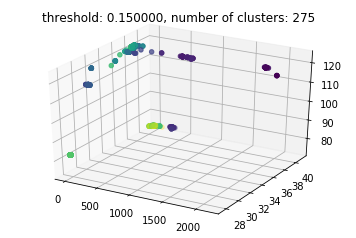

545
['hxl - 1265.jpg']


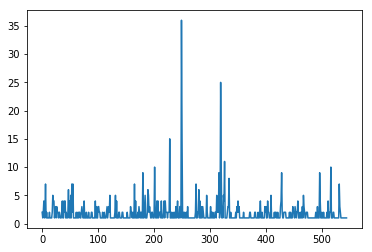

In [19]:
# find cluster (gps)
thres_gps = 0.15 # degree in longtitude and latitude
thres_time = 60*30 # seconds
clusters_gps = find_cluster(wanted_gps, thres_gps, True)
# cluster based on gps, then time
res_fns = []
for i in range(1,len(clusters_gps)+1):
    curr_idx = clusters_gps == i
    curr_files = file_names[curr_idx]
    if sum(curr_idx) == 1:
        res_fns.append(curr_files)
    elif sum(curr_idx) > 1:
        curr_gps = wanted_gps[curr_idx]
        curr_time = wanted_time[curr_idx]
        curr_secs = convert_datetime_seconds(curr_time)
        # cluster based on time （threshold = 300s)
#         print(len(curr_time))
#         pdb.set_trace()
        clusters_time = find_cluster(curr_secs, thres_time, False) 
        for j in range(1, 1+ len(clusters_time)):
            cidx = clusters_time == j
            if sum(cidx) > 0:
                res_fns.append(curr_files[cidx])

    else:
        continue
print(len(res_fns))
print(res_fns[-1])
# visualize
plt.plot(range(len(res_fns)), [len(x) for x in res_fns])
plt.show()

Top ten scenes (idx, number of pics/scene): [249, 319, 228, 250, 326] [36, 25, 15, 15, 11]
Least ten scenes (idx, number of pics/scene), but not so meaningful: [539, 540, 541, 542, 543] [1, 1, 1, 1, 1]
Show the 1th scene below (36 pics in total):
> <ipython-input-23-52c2cac85795>(15)<module>()
-> print_pic_all(tar_fns[rand_idx], pic_path+os.path.sep)
(Pdb) c


/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


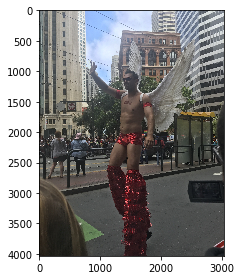

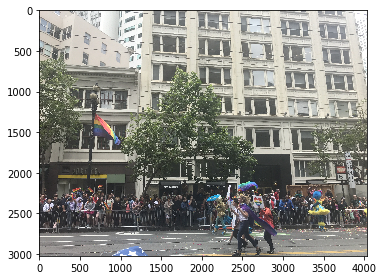

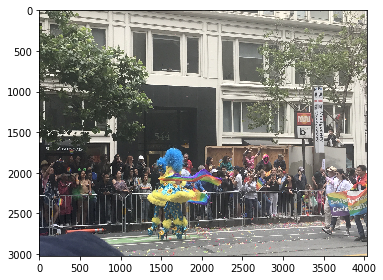

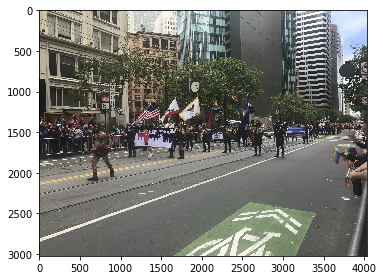

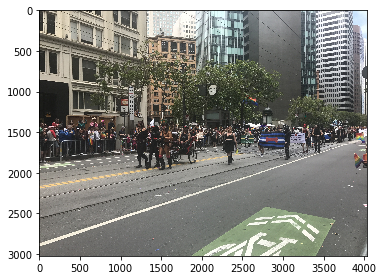

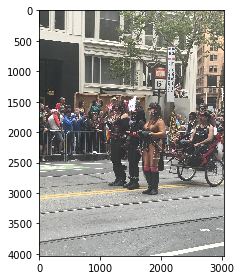

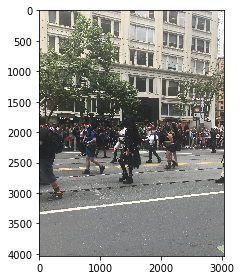

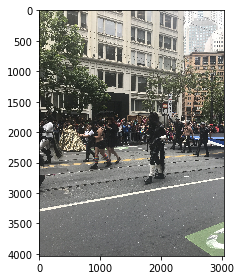

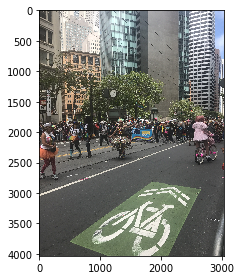

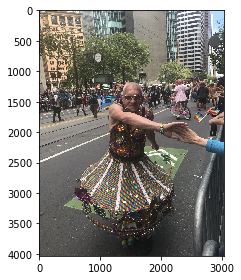

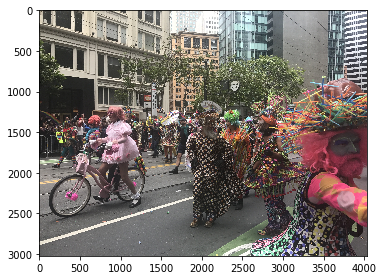

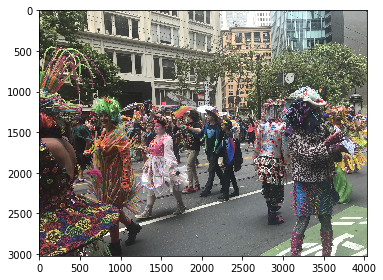

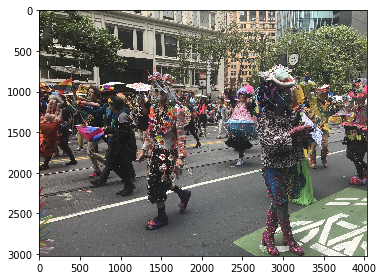

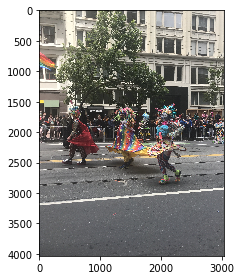

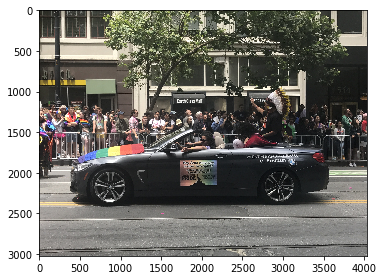

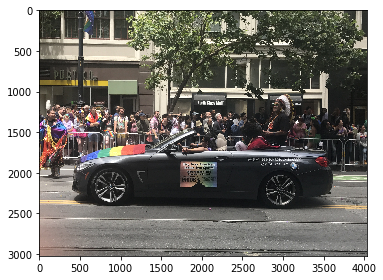

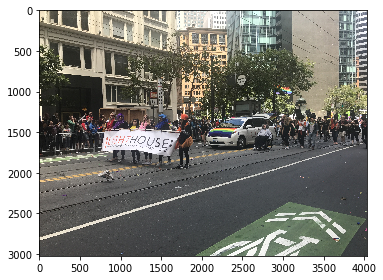

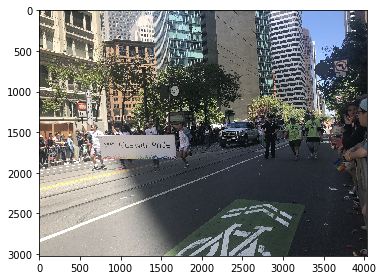

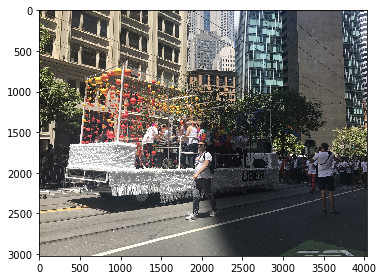

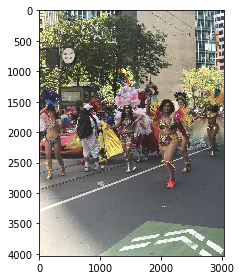

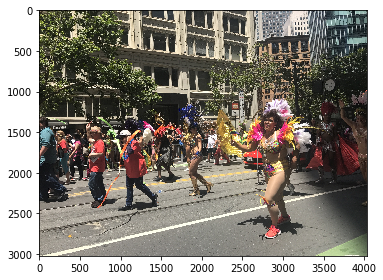

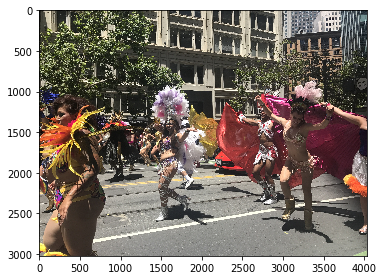

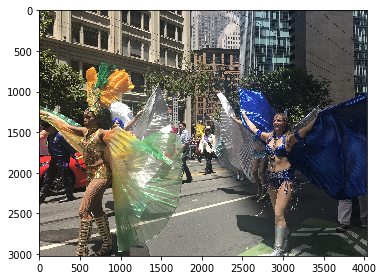

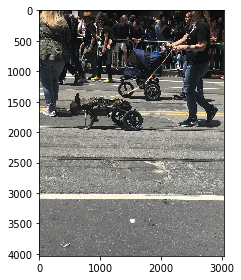

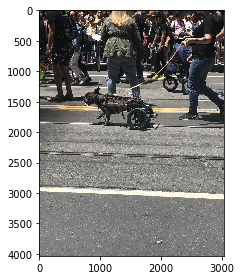

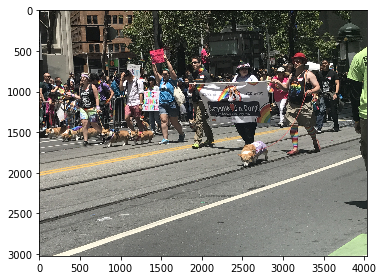

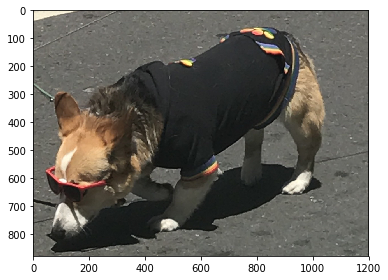

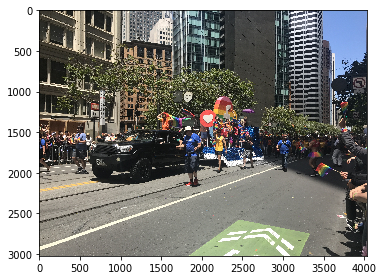

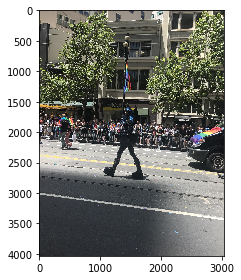

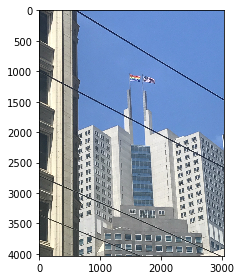

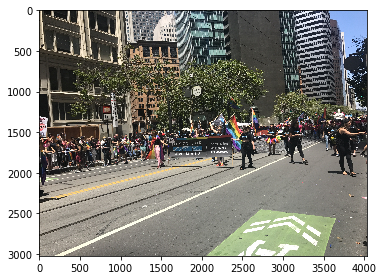

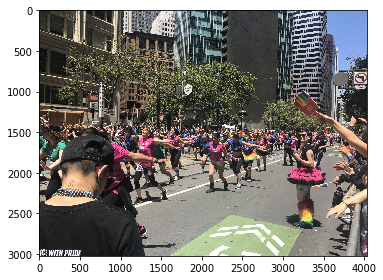

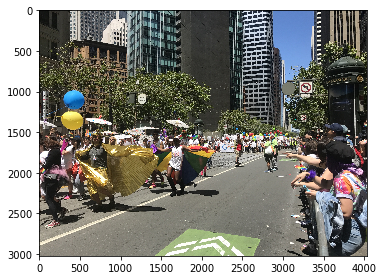

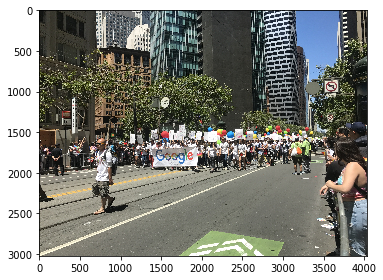

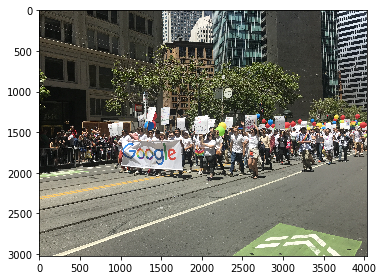

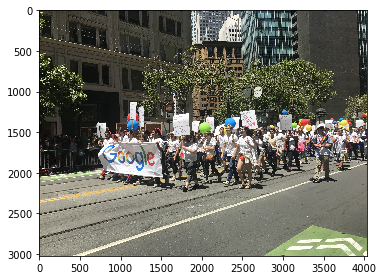

In [23]:
# print all pic for the most/least ten clusters
num_most, num_least = 5, 5
pic_path = os.path.join('/Users/luke/Documents/album_data', usr_nm)
tmp_len = [len(x) for x in res_fns]
tar_idx = sorted(range(len(tmp_len)), key = lambda k: tmp_len[k], reverse = True)
print("Top ten scenes (idx, number of pics/scene):", tar_idx[:num_most], [tmp_len[x] for x in tar_idx[:num_most]])
print("Least ten scenes (idx, number of pics/scene), but not so meaningful:", tar_idx[-num_least - 1:-1], [tmp_len[x] for x in tar_idx[-num_least-1:-1]])
# print all pics in a given list
rand_idx = np.random.randint(num_most)
rand_idx = 0
if True:
    tar_fns = [res_fns[x] for x in tar_idx[:num_most]]
    print("Show the %dth scene below (%d pics in total):" %(rand_idx+1, len(tar_fns[rand_idx])))
#     pdb.set_trace()
    print_pic_all(tar_fns[rand_idx], pic_path+os.path.sep)


## two-two compare (use feature (Longitude, Latitude, time))

In [ ]:
dis_precision = 0.2 # km
time_precision = 120 # s
features = np.transpose(np.concatenate((np.transpose(wanted_gps[:,1:]), np.transpose(wanted_secs))))
f_22 = np.empty(shape = [len(features), len(features)])
for i in range(len(features)):
    for j in range(len(features)):
        if lalong2distance(features[i,:2], features[j, :2]) < dis_precision and abs(features[i,2] - features[j, 2]) < time_precision:
            f_22[i, j] = 1
        else:
            f_22[i, j] = 0

plt.figure(figsize = (20,20))
plt.imshow(f_22)
plt.show()

In [ ]:
tmp_cluster = find_cluster(features, 3)

In [ ]:
print(res_fns[24])
print(wanted_gps[file_names == [res_fns[24][0]]])
print(wanted_gps[file_names == [res_fns[24][1]]])
print(wanted_gps[file_names == [res_fns[24][2]]])
print(wanted_time[file_names == [res_fns[24][0]]])
print(wanted_time[file_names == [res_fns[24][1]]])
print(wanted_time[file_names == [res_fns[24][2]]])

## Models (wide and deep model -- only deep)
### Sample: one-one compare (feature difference) 
### Feature: gps, time, exif info
### label: same-different scene -- ground truth is from the cluster data -- double check